In [1]:
import sympy as sp
import numpy as np

In [3]:
t, y0, z = sp.symbols('t, y_0,  z')

def f(t,z):
    return (t-z)/2

In [4]:
a = 0; b = 1;   # extremos inferior y superior del intervalo 
ya = 1          # condición inicial del PVI

In [5]:
# Vamos a empezar definiendo la Ec. Dif. Ordinaria (edo) a resolver
y = sp.Function('y')
edo = y(t).diff(t)-f(t,y(t))

# y la resolvemos simbólicamente mediante la orden dsolve de SymPy
edo_sol = sp.dsolve(edo)
edo_sol


# Veámos ahora cómo imponer las condiciones iniciales a través
ics = {y(0): y0}  #  de una entrada de diccionario
# esta sería finalmente la ecuación asociada a la imposición de la condición inicial del PVI
CI_eq = sp.Eq(edo_sol.lhs.subs(t, 0).subs(ics),edo_sol.rhs.subs(t, 0))

CI_sol = sp.solve(CI_eq) # que resolvemos mediante la orden solve y extraemos la única solución de ésta

# así como la obtención de las constantes de integración en función de las condiciones iniciales
edo_sol.subs(CI_sol[0]) 

sol_exacta = edo_sol.rhs.subs(CI_sol[0]).subs({y0:ya})
sol_exacta

((t - 2)*exp(t/2) + 3)*exp(-t/2)

In [6]:
import eulermejorado
import eulermodificado

Valores aproximados por Euler Mejorado (Punto Medio) con tamaño de paso h=0.1-------------------------
[1.         0.95375    0.91462969 0.88229149 0.85640478 0.83665505
 0.82274311 0.81438439 0.81130815 0.81325688 0.8199856 ]

Valores aproximados por Euler Modificado (Heun) con tamaño de paso h=0.1----------------------------
[1.         0.95375    0.91462969 0.88229149 0.85640478 0.83665505
 0.82274311 0.81438439 0.81130815 0.81325688 0.8199856 ]

Soluciones exactas----------------------------------------------------------------------------------
[1.00000000000000 0.953688273502142 0.914512254107879 0.882123929275174
 0.856192259233945 0.836402349214215 0.822454662045154 0.814064269156140
 0.810960138106918 0.812884454865320 0.819591979137900]

Error máximo en valor absoluto de Euler Mejorado----------------------------------------------------
0.000393623839967439

Error máximo en valor absoluto de Euler Modificado--------------------------------------------------
0.00039362383996732

NameError: name 'yEulerexpl' is not defined

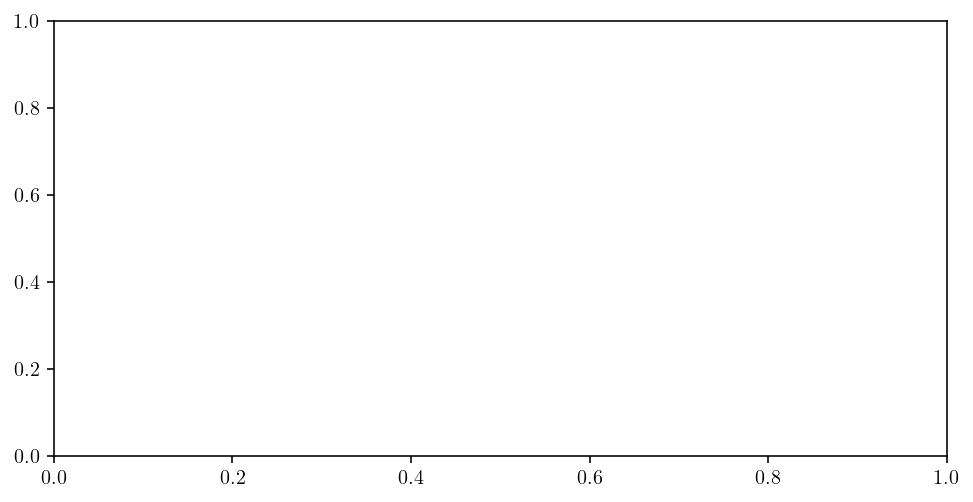

In [7]:
N=10

#F,x0,y0,xfinal,N


xx, yEulerMejorado=eulermejorado.integrate(f,a,ya,b,N)
xx, yEulerModificado=eulermodificado.integrate(f,a,ya,b,N)
valores_exactos = np.array([sol_exacta.subs({t:xx[n]}) for n in range(len(xx))])

print("Valores aproximados por Euler Mejorado (Punto Medio) con tamaño de paso h=0.1-------------------------")
print(yEulerMejorado)
print("\nValores aproximados por Euler Modificado (Heun) con tamaño de paso h=0.1----------------------------")
print(yEulerModificado)
print("\nSoluciones exactas----------------------------------------------------------------------------------")
print(valores_exactos)

print("\nError máximo en valor absoluto de Euler Mejorado----------------------------------------------------")
print(abs(valores_exactos-yEulerMejorado).max())
print("\nError máximo en valor absoluto de Euler Modificado--------------------------------------------------")
print(abs(valores_exactos-yEulerModificado).max())

In [ ]:
import RK_general

butcher=[[0,0],[2/3,0]]
coef=[1/4,3/4]

xx, yRK = RK_general.integrate(f,a,ya,b,N,butcher,coef)
print("\nValores aproximados por Runge-Kutta dos evaluaciones con tamaño de paso h=0.1-------------------------")
print(yRK)
print("\nError máximo en valor absoluto Runge-Kutta dos evaluaciones-------------------------------------------")
print(abs(valores_exactos-yRK).max())


Se observa que Euler Mejorado y Runge-Kutta para 2 evaluaciones obtienen el mismo error, mientras que el error de Euler Modificado difiere en el decimal 16, siendo este un poco menor que en los otros dos casos, luego se concluye que el método de Euler Modificado es un poco mejor.